In [1]:
import pandas as pd
import datetime
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
        #print(dfs[-1])
    return pd.concat(dfs)
        





In [2]:
## IMPORTING in df1 MTA DATA FOR YEAR 2021
week_nums = [211225, 211218, 211211, 211204,
             211127, 211120, 211113, 211106,
             211030, 211023, 211016, 211009, 211002,
             210925, 210918, 210911, 210904,
             210828, 210821, 210814, 210807,
             210731, 210724, 210717, 210710, 210703,
             210626, 210619, 210612, 210605,
             210529, 210522, 210515, 210508, 210501,
             210424, 210417, 210410, 210403,
             210327, 210320, 210313, 210306,
             210227, 210220, 210213, 210206,
             210130, 210123, 210116, 210109, 210102
            ]
df1 = get_data(week_nums)
df1.columns = [column.strip() for column in df1.columns]
df1["DATE_TIME"] = pd.to_datetime(df1.DATE + " " + df1.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df1.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
df1.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [3]:
## IMPORTING in df2 MTA DATA FOR YEAR 2019
week_nums = [191228, 191221, 191214, 191207,
             191130, 191123, 191116, 191109,191102,
             191026, 191019, 191012, 191005,
             190928, 190921, 190914, 190907,
             190831, 190824, 190817, 190810,190803,
             190727, 190720, 190713, 190706, 
             190629, 190622, 190615, 190608, 190601,
             190525, 190518, 190511, 190504,
             190427, 190420, 190413, 190406,
             190330, 190323, 190316, 190309,190302,
             190223, 190216, 190209, 190202,
             190126, 190119, 190112, 190105
            ]

df2 = get_data(week_nums)
df2.columns = [column.strip() for column in df2.columns]
df2["DATE_TIME"] = pd.to_datetime(df2.DATE + " " + df2.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df2.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
df2.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)





In [4]:
## IMPORTING in df3 MTA DATA FOR YEAR 2020
week_nums = [201226, 201219, 201212, 201205,
             201128, 201121, 201114, 201107,
             201031, 201024, 201017, 201010, 201003,
             200926, 200919, 200912, 200905,
             200829, 200822, 200815, 200808, 200801,
             200725, 200718, 200711, 200704,
             200627, 200620, 200613, 200606,
             200530, 200523, 200516, 200509, 200502,
             200425, 200418, 200411, 200404,
             200328, 200321, 200314, 200307,
             200229, 200222, 200215, 200208, 200201,
             200125, 200118, 200111, 200104]
df3 = get_data(week_nums)
df3.columns = [column.strip() for column in df3.columns]
df3["DATE_TIME"] = pd.to_datetime(df3.DATE + " " + df3.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df3.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
df3.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)



In [7]:
#REFERENCE FROM MTA EXERCISE 2 SOLUTION -- TAKING CARE IF CUMULATIVE COUNTER GET RESET TO ZERO OR A MAX COUNTER NUMBER
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter: 
        counter = min(row["ENTRIES"], row["PREV ENTRIES"])
    if counter > max_counter:
       return 0
    return counter

In [8]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df1_counter = df1[((df1["STATION"] == 'JKSN HT-ROOSVLT') & (df1["LINENAME"] == 'EFMR7'))]

df1_counter[['PREV DATE_TIME','PREV ENTRIES']] = df1_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'ENTRIES'].apply(lambda x: x.shift(1))
df1_counter.dropna(subset = ["PREV DATE_TIME"], axis = 0,inplace = True)
df1_counter["DAILY ENTRIES"]= df1_counter.apply(get_daily_counts, axis=1, max_counter=400000)

df1_counter.drop(df1_counter[(df1_counter['DATE_TIME'].dt.year == 2020)].index , axis = 0, inplace = True)



/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/256912933.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_counter[['PREV DATE_TIME','PREV ENTRIES']] = df1_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'ENTRIES'].apply(lambda x: x.shift(1))
/Users/divyauppal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/divyauppal/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [10]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df2_counter = df2[((df2["STATION"] == 'JKSN HT-ROOSVLT') & (df2["LINENAME"] == 'EFMR7'))]

df2_counter[['PREV DATE_TIME','PREV ENTRIES']] = df2_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'ENTRIES'].apply(lambda x: x.shift(1))
df2_counter.dropna(subset = ["PREV DATE_TIME"], axis = 0,inplace = True)
df2_counter["DAILY ENTRIES"]= df2_counter.apply(get_daily_counts, axis=1, max_counter=400000)

df2_counter.drop(df2_counter[(df2_counter['DATE_TIME'].dt.year == 2018)].index , axis = 0, inplace = True)




/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/4217173779.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_counter[['PREV DATE_TIME','PREV ENTRIES']] = df2_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'ENTRIES'].apply(lambda x: x.shift(1))
/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/4217173779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_counter["DAILY ENTRIES"]= df2_counter.apply(get_daily_counts, axis=1, max_counter=400000)


In [11]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df3_counter = df3[((df3["STATION"] == 'JKSN HT-ROOSVLT') & (df3["LINENAME"] == 'EFMR7'))]

df3_counter[['PREV DATE_TIME','PREV ENTRIES']] = df3_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'ENTRIES'].apply(lambda x: x.shift(1))
df3_counter.dropna(subset = ["PREV DATE_TIME"], axis = 0,inplace = True)
df3_counter["DAILY ENTRIES"]= df3_counter.apply(get_daily_counts, axis=1, max_counter=400000)

df3_counter.drop(df3_counter[(df3_counter['DATE_TIME'].dt.year == 2019)].index , axis = 0, inplace = True)




/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/256527295.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3_counter[['PREV DATE_TIME','PREV ENTRIES']] = df3_counter.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE_TIME', 'ENTRIES'].apply(lambda x: x.shift(1))
/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/256527295.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_counter["DAILY ENTRIES"]= df3_counter.apply(get_daily_counts, axis=1, max_counter=400000)


/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/2723488960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_counter['BIN'] = pd.cut(x = df1_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_72021/2723488960.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_counter['BIN'] = pd.cut(x = df2_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
/var/folders/gw/wvwjhy9x

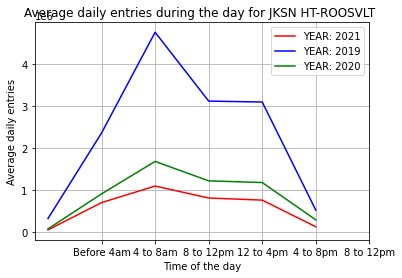

In [12]:
#Analyzing Hourly Daily entries data and putting them in bin accordingly

import matplotlib.pyplot as plt
df1_counter.sort_values(by = "DAILY ENTRIES", ascending = False)
df1_counter['BIN'] = pd.cut(x = df1_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
df1_day = df1_counter.groupby("BIN")["DAILY ENTRIES"].sum()


df2_counter.sort_values(by = "DAILY ENTRIES", ascending = False)
df2_counter['BIN'] = pd.cut(x = df2_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
df2_day = df2_counter.groupby("BIN")["DAILY ENTRIES"].sum()


df3_counter.sort_values(by = "DAILY ENTRIES", ascending = False)
df3_counter['BIN'] = pd.cut(x = df3_counter["DATE_TIME"].dt.hour, bins =[0,4,8,12,16,20,23],labels = [1,2,3,4,5,6])
df3_day = df3_counter.groupby("BIN")["DAILY ENTRIES"].sum()






plt.plot(df1_day,label = 'YEAR: 2021', color = 'red')
plt.plot(df2_day, label = 'YEAR: 2019', color = 'blue')
plt.plot(df3_day, label = 'YEAR: 2020', color = 'green')
plt.xticks([1,2,3,4,5,6],['Before 4am','4 to 8am', '8 to 12pm','12 to 4pm','4 to 8pm','8 to 12pm'])
plt.xlabel("Time of the day")
plt.ylabel("Average daily entries")
plt.title("Average daily entries during the day for JKSN HT-ROOSVLT ")
plt.grid()
plt.legend()
plt.show()



In [93]:
#680 ENTERIES WHERE TIME DIFF IS NOT EVERY 4 HOURS from 56549 enteries ie 1.2%

#37455 entries dont have 3,5,7,9,12 hours
df1_day


BIN
1     115026.0
2     191830.0
3     636535.0
4    1178348.0
5    2104637.0
6     288744.0
Name: DAILY ENTRIES, dtype: float64

In [17]:
#FINDING DAILY ENTRIES FOR DF1 (YEAR 2021) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES

df1_daily= df1.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).ENTRIES.first()
df1_daily[['PREV DATE','PREV ENTRIES']] = df1_daily.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))
df1_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df1_daily["DAILY ENTRIES"]= df1_daily.apply(get_daily_counts, axis=1, max_counter=150000)

df1_daily.drop(df1_daily[(df1_daily['DATE'].astype('datetime64').dt.year == 2020)].index , axis = 0, inplace = True)



/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64496/1786052229.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1_daily[['PREV DATE','PREV ENTRIES']] = df1_daily.groupby(['C/A','UNIT','SCP','STATION','LINENAME'])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))


In [18]:
#FINDING DAILY ENTRIES FOR DF2 (YEAR 2019) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES


df2_daily= df2.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).ENTRIES.first()
df2_daily[['PREV DATE','PREV ENTRIES']] = df2_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))
df2_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df2_daily["DAILY ENTRIES"]= df2_daily.apply(get_daily_counts, axis=1, max_counter=150000)

df2_daily.drop(df2_daily[(df2_daily['DATE'].astype('datetime64').dt.year == 2018)].index , axis = 0, inplace = True)




/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64496/170134422.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2_daily[['PREV DATE','PREV ENTRIES']] = df2_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))


In [19]:
#FINDING DAILY ENTRIES FOR DF3 (YEAR 2020) ; CHOSEN MAX_COUNTER DEPENDING ON NO OF ENTERIES 
#AS PERCENT TO TOTAL ENTRIES


df3_daily= df3.groupby(['C/A','UNIT','SCP','STATION','DATE',"LINENAME"], as_index = False).ENTRIES.first()
df3_daily[['PREV DATE','PREV ENTRIES']] = df3_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))
df3_daily.dropna(subset = ["PREV DATE"], axis = 0,inplace = True)
df3_daily["DAILY ENTRIES"]= df3_daily.apply(get_daily_counts, axis=1, max_counter=150000)

df3_daily.drop(df3_daily[(df3_daily['DATE'].astype('datetime64').dt.year == 2019)].index , axis = 0, inplace = True)

/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64496/744712614.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3_daily[['PREV DATE','PREV ENTRIES']] = df3_daily.groupby(['C/A','UNIT','SCP','STATION',"LINENAME"])['DATE', 'ENTRIES'].apply(lambda x: x.shift(1))


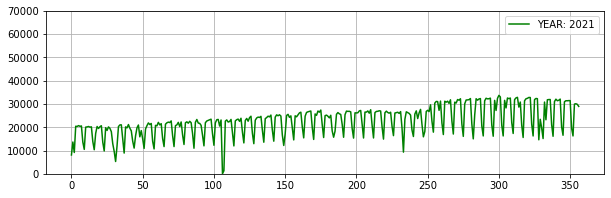

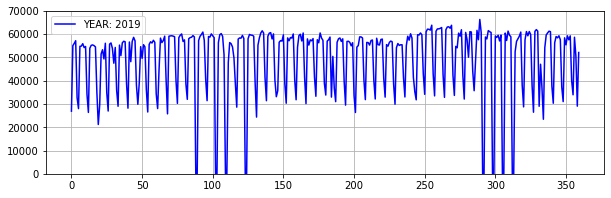

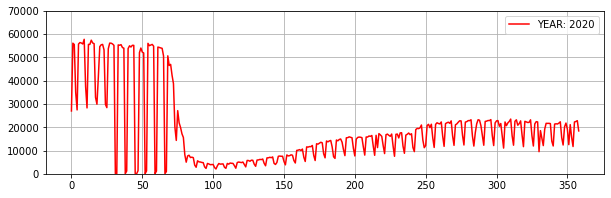

In [33]:
######TIME SERIES FOR STATIONS
import matplotlib.pyplot as plt
df1_counter_slice =  df1_daily[((df1_daily["STATION"] == 'FLUSHING-MAIN') & (df1_daily["LINENAME"] == '7'))]
#df1_counter_slice.drop(df1_counter_slice[(df1_counter_slice["DAILY ENTRIES"] == 193131)].index, axis = 0, inplace = True)
df1_station = df1_counter_slice.groupby(["DATE"])["DAILY ENTRIES"].sum().reset_index()
                                                                                                        
list1 = list(df1_station["DAILY ENTRIES"])

df2_counter_slice =  df2_daily[((df2_daily["STATION"] == 'FLUSHING-MAIN') & (df2_daily["LINENAME"] == '7'))]

#df2_counter_slice.drop(df2_counter_slice[((df2_counter_slice["DATE"] == '03/05/2019') \
 #    & (df2_counter_slice["C/A"] == 'N507') & (df2_counter_slice["UNIT"] == 'R023') \
  #  & (df2_counter_slice["PREV DATE"] == '02/21/2019'))].index, axis = 0, inplace = True)

df2_station = df2_counter_slice.groupby(["DATE"])["DAILY ENTRIES"].sum().reset_index()
list2 = list(df2_station["DAILY ENTRIES"])

df3_counter_slice =  df3_daily[((df3_daily["STATION"] == 'FLUSHING-MAIN') & (df3_daily["LINENAME"] == '7'))]
#df3_counter_slice.drop([851900, 859021,32131,860171,852021], axis = 0, inplace = True)
df3_station = df3_counter_slice.groupby(["DATE"])["DAILY ENTRIES"].sum().reset_index()
list3 = list(df3_station["DAILY ENTRIES"])


plt.figure(figsize=(10,3))
plt.ylim((0, 70000))
plt.plot(list1,color ='green',label = 'YEAR: 2021')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.ylim((0, 70000))
plt.plot(list2, color ='blue',label = 'YEAR: 2019')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.ylim((0, 70000))
plt.plot(list3, color ='red',label = 'YEAR: 2020')
plt.grid()
plt.legend()
plt.show()



In [30]:
#df1_station

df1_counter_slice[(df1_counter_slice.sort_values("DAILY ENTRIES", ascending = False)["DAILY ENTRIES"] == 0)]
#df2_counter_slice[((df2_counter_slice["DATE"] == '03/05/2019') & (df2_counter_slice["C/A"] == 'N507') & (df2_counter_slice["UNIT"] == 'R023') & (df2_counter_slice["PREV DATE"] == '02/21/2019'))].head(80)

/var/folders/gw/wvwjhy9x081fklj612jm2m100000gn/T/ipykernel_64496/3016141970.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_counter_slice[(df1_counter_slice.sort_values("DAILY ENTRIES", ascending = False)["DAILY ENTRIES"] == 0)]


,C/A,UNIT,SCP,STATION,DATE,LINENAME,ENTRIES,PREV DATE,PREV ENTRIES,DAILY ENTRIES
1692888,R533,R055,00-00-03,FLUSHING-MAIN,04/18/2021,7,2113934,04/17/2021,2113934.0,0.0
1693452,R533,R055,00-00-04,FLUSHING-MAIN,11/04/2021,7,1119686,11/03/2021,1119686.0,0.0
1693453,R533,R055,00-00-04,FLUSHING-MAIN,11/05/2021,7,1119686,11/04/2021,1119686.0,0.0
1693454,R533,R055,00-00-04,FLUSHING-MAIN,11/06/2021,7,1119686,11/05/2021,1119686.0,0.0
1694212,R533,R055,00-00-06,FLUSHING-MAIN,12/06/2021,7,18316742,12/05/2021,18316742.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1701039,R534,R055,01-05-01,FLUSHING-MAIN,12/20/2021,7,262144,12/19/2021,262144.0,0.0
1701040,R534,R055,01-05-01,FLUSHING-MAIN,12/21/2021,7,262144,12/20/2021,262144.0,0.0
1701041,R534,R055,01-05-01,FLUSHING-MAIN,12/22/2021,7,262144,12/21/2021,262144.0,0.0
1701042,R534,R055,01-05-01,FLUSHING-MAIN,12/23/2021,7,262144,12/22/2021,262144.0,0.0


[0, 1, 2, 3, 4, 5, 6]
[400.0, 867.0, 792.0, 851.0, 807.0, 795.0, 503.0]
[0, 1, 2, 3, 4, 5, 6]
[452.0, 778.0, 820.0, 799.0, 779.0, 796.0, 612.0]
[0, 1, 2, 3, 4, 5, 6]
[405.0, 670.0, 752.0, 746.0, 732.0, 753.0, 607.0]
[0, 1, 2, 3, 4, 5, 6]
[440.0, 740.0, 686.0, 758.0, 775.0, 685.0, 498.0]
[0, 1, 2, 3, 4, 5, 6]
[388.0, 225.0, 628.0, 781.0, 742.0, 845.0, 576.0]
[0, 1, 2, 3, 4, 5, 6]
[372.0, 785.0, 786.0, 828.0, 754.0, 690.0, 583.0]
[0, 1, 2, 3, 4, 5, 6]
[522.0, 635.0, 713.0, 753.0, 655.0, 767.0, 1097.0]
[0, 1, 2, 3, 4, 5, 6]
[692.0, 1271.0, 1295.0, 1274.0, 1225.0, 1229.0, 849.0]
[0, 1, 2, 3, 4, 5, 6]
[616.0, 1145.0, 1082.0, 1216.0, 1253.0, 1213.0, 868.0]
[0, 1, 2, 3, 4, 5, 6]
[642.0, 1100.0, 1076.0, 1176.0, 1177.0, 1230.0, 863.0]
[0, 1, 2, 3, 4, 5, 6]
[663.0, 975.0, 1051.0, 1114.0, 1002.0, 1094.0, 931.0]
[0, 1, 2, 3, 4, 5, 6]
[709.0, 1071.0, 1125.0, 1172.0, 1221.0, 1198.0, 960.0]
[0, 1, 2, 3, 4, 5, 6]
[615.0, 1168.0, 1095.0, 1118.0, 1052.0, 1128.0, 895.0]
[0, 1, 2, 3, 4, 5, 6]
[650.0, 1149

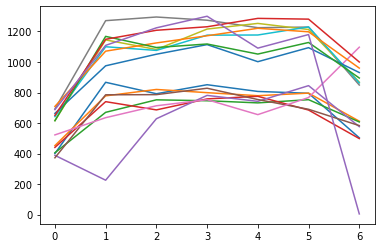

In [24]:
###COMPARISION OF WEEKDAY AND WEEKEND TRAFFIC
#Exercise 9
import matplotlib.pyplot as plt


df1_week = df1_counter_slice.copy()


df1_week['DATE'] = pd.to_datetime(df1_week['DATE'])
df1_week["WEEKDAY"] = df1_week["DATE"].dt.weekday

df1_groupby_day = df1_week.groupby("WEEKDAY")["DAILY ENTRIES"].mean()

counter = 2
while (counter <= 100):
    list1= [0,1,2,3,4,5,6]
    list2 =[]
    i = 0
    while i < 7:
        if (df1_week["WEEKDAY"].iloc[counter] == i):
            list2.append((df1_week["DAILY ENTRIES"]).iloc[counter])
            counter = counter + 1
        else:
            list2.append(df1_groupby_day[i])
        i = i+1
    
    print(list1)
    print(list2)
    plt.plot(list1,list2)
   # plt.show()     
   # plt.legend()
  #  counter = counter + 7

In [111]:
df1_counter_slice.head(50)

,C/A,UNIT,SCP,STATION,DATE,LINENAME,ENTRIES,PREV DATE,PREV ENTRIES,DAILY ENTRIES
28754,A022,R022,01-00-00,34 ST-HERALD SQ,01/02/2021,BDFMNQRW,28688662,01/01/2021,28688281.0,381.0
28755,A022,R022,01-00-00,34 ST-HERALD SQ,01/03/2021,BDFMNQRW,28689369,01/02/2021,28688662.0,707.0
28756,A022,R022,01-00-00,34 ST-HERALD SQ,01/04/2021,BDFMNQRW,28689781,01/03/2021,28689369.0,412.0
28757,A022,R022,01-00-00,34 ST-HERALD SQ,01/05/2021,BDFMNQRW,28690855,01/04/2021,28689781.0,1074.0
28758,A022,R022,01-00-00,34 ST-HERALD SQ,01/06/2021,BDFMNQRW,28691988,01/05/2021,28690855.0,1133.0
28759,A022,R022,01-00-00,34 ST-HERALD SQ,01/07/2021,BDFMNQRW,28693061,01/06/2021,28691988.0,1073.0
28760,A022,R022,01-00-00,34 ST-HERALD SQ,01/08/2021,BDFMNQRW,28694177,01/07/2021,28693061.0,1116.0
28761,A022,R022,01-00-00,34 ST-HERALD SQ,01/09/2021,BDFMNQRW,28695201,01/08/2021,28694177.0,1024.0
28762,A022,R022,01-00-00,34 ST-HERALD SQ,01/10/2021,BDFMNQRW,28695872,01/09/2021,28695201.0,671.0
28763,A022,R022,01-00-00,34 ST-HERALD SQ,01/11/2021,BDFMNQRW,28696391,01/10/2021,28695872.0,519.0


In [13]:
df1_counter.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,PREV DATE_TIME,PREV ENTRIES,DAILY ENTRIES,BIN
3378,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/01/2021,03:00:00,REGULAR,28688281,12101319,2021-01-01 03:00:00,2020-12-31 23:00:00,28688256.0,25.0,1
3379,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/01/2021,07:00:00,REGULAR,28688286,12101327,2021-01-01 07:00:00,2021-01-01 03:00:00,28688281.0,5.0,2
3380,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/01/2021,11:00:00,REGULAR,28688314,12101384,2021-01-01 11:00:00,2021-01-01 07:00:00,28688286.0,28.0,3
3381,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/01/2021,15:00:00,REGULAR,28688419,12101506,2021-01-01 15:00:00,2021-01-01 11:00:00,28688314.0,105.0,4
3382,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/01/2021,19:00:00,REGULAR,28688577,12101650,2021-01-01 19:00:00,2021-01-01 15:00:00,28688419.0,158.0,5
3383,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/01/2021,23:00:00,REGULAR,28688647,12101699,2021-01-01 23:00:00,2021-01-01 19:00:00,28688577.0,70.0,6
3313,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,03:00:00,REGULAR,28688662,12101715,2021-01-02 03:00:00,2021-01-01 23:00:00,28688647.0,15.0,1
3314,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,07:00:00,REGULAR,28688666,12101729,2021-01-02 07:00:00,2021-01-02 03:00:00,28688662.0,4.0,2
3315,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,11:00:00,REGULAR,28688725,12101814,2021-01-02 11:00:00,2021-01-02 07:00:00,28688666.0,59.0,3
3316,A022,R022,01-00-00,34 ST-HERALD SQ,BDFMNQRW,BMT,01/02/2021,15:00:00,REGULAR,28688910,12102121,2021-01-02 15:00:00,2021-01-02 11:00:00,28688725.0,185.0,4
